<a href="https://colab.research.google.com/github/SandeeeeeeeeepDey/data-science-11-weeks-progg/blob/main/Exercise_chapter_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1

Draw an ANN using the original artificial neurons (like the ones in
Figure 10-3) that computes A ⊕ B (where ⊕ represents the XOR
operation). Hint: A ⊕ B = (A ∧ ¬ B) ∨ (¬ A ∧ B).

In [ ]:
import torch
from torch import nn

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [ ]:
batch = {"x1": torch.tensor([[1],[1],[0],[0]]), "x2": torch.tensor([[1],[0],[0],[1]])}
batch = {k: v.to(device) for k,v in batch.items()}

In [ ]:
class XORAgain(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight_l1 = torch.tensor([[1,1],[1,1]])
    self.weight_l2 = torch.tensor([[-1],[1]])

    self.bias_l1 = torch.tensor([[-1.5,-0.5]])
    self.bias_l2 = torch.tensor([[-0.5]])

  def step(self, x):
    return (x >= 0).long()

  def forward(self, batch):
    x1, x2 = batch["x1"], batch["x2"]
    # print()
    input = torch.cat([x1,x2], dim = 1)
    # print(input,"\n", self.weight_l1)
    l1 = input @ self.weight_l1 + self.bias_l1
    l1 = self.step(l1)
    l2 = (l1 @ self.weight_l2) + self.bias_l2
    l2 = self.step(l2)
    return l2

In [ ]:
xor = XORAgain().to(device)

xor

XORAgain()

In [ ]:
xor(batch)

tensor([[1, 1],
        [1, 0],
        [0, 0],
        [0, 1]]) 
 tensor([[1, 1],
        [1, 1]])


tensor([[0],
        [1],
        [0],
        [1]])

# Q2



Why is it generally preferable to use a logistic regression classifier
rather than a classic perceptron (i.e., a single layer of threshold logic
units trained using the perceptron training algorithm)? How can you
tweak a perceptron to make it equivalent to a logistic regression
classifier?

1: Perceptrons,like lr are incapable of being used to perform logical ops like XOR  (extra)

2: Perceptron dosent give probabilistic output

3: Perceptrons dont regularize and stops after accounting for all errors

4: To make perceptrons uqual to lgistic regressors we can increase the number of layers and put in no linear activation functions like sigmoid

#Q3

Why was the sigmoid activation function a key ingredient in training
the first MLPs?

Sigmoid as activation removed the 0 or one classification and enabled perceptrons to also output probabilistic results like logistic regression

#Q4

5. Name three popular activation functions. Can you draw them?

ReLU, tanh, sigmoid, leaky ReLU

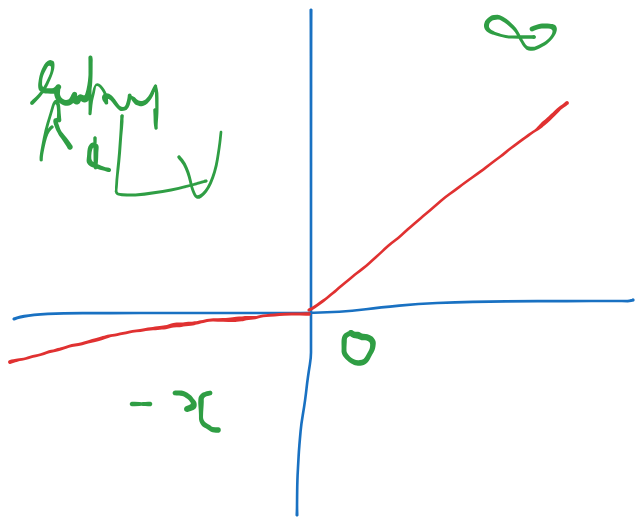

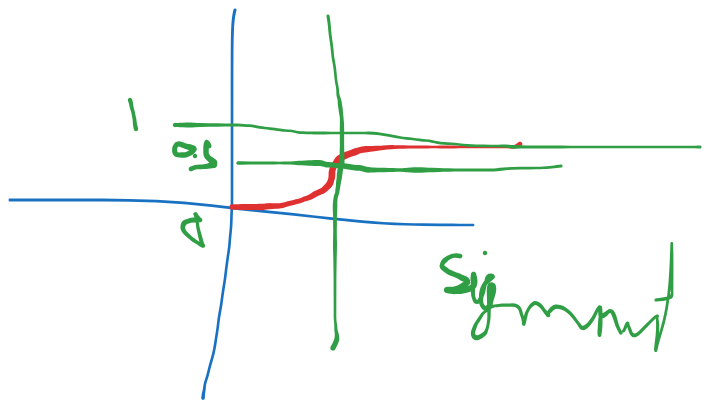

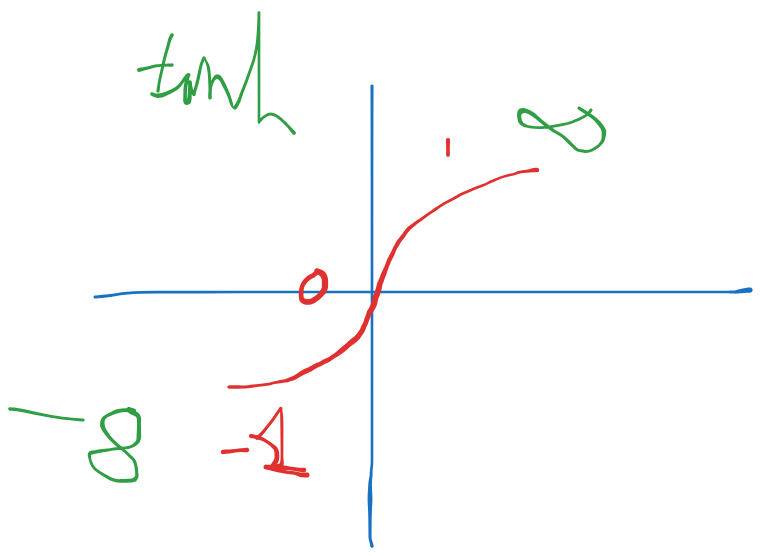

#Q5
 Suppose you have an MLP composed of one input layer with 10
passthrough neurons, followed by one hidden layer with 50 artificial
neurons, and finally one output layer with 3 artificial neurons. All
artificial neurons use the ReLU activation function.
a. What is the shape of the input matrix X?
b. What are the shapes of the hidden layer’s weight matrix W and
bias vector b ?
c. What are the shapes of the output layer’s weight matrix W and
bias vector b ?
d. What is the shape of the network’s output matrix Y?
e. Write the equation that computes the network’s output matrix Y
as a function of X, W , b , W , and b .

##Keras trial failed(Knowledge gap)

In [ ]:
import tensorflow as tf


In [3]:
batch = [[1],[1],[0],[1],[0],[0],[1],[1],[1],[1]]
# batch = [x.to(device) for x in batch]

In [6]:
class Q5(tf.keras.Model):
  def __init__(self, activation = 'relu', **kwargs):
    super().__init__()
    self.input_layer = tf.keras.Input(shape = [10]) # shape = (rows from dataset, 10)
    self.h1 = tf.keras.layers.Dense(50, activation = activation) # w_shape = (10, 50) b_shape = (50, 0)
    self.output_ = tf.keras.layers.Dense(3, activation = activation) # w_shape = (50, 3) b_shape = (3, 0)

  def call(self, inputs):
    X = self.input_layer(inputs)
    h1 = self.h1(X)
    output = self.output_(h1)
    return output



In [7]:
q5 = Q5(name = "Q5")

In [8]:
optimizer = tf.keras.optimizers.Adam()

In [9]:
q5.compile(loss = "mse", optimizer = optimizer, metrics = "RootMeanSquaredError")

In [11]:
q5.fit(batch, epochs = 1)

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/tmp/__autograph_generated_filee2ffk79m.py", line 10, in tf__call
        X = ag__.converted_call(ag__.ld(self).input_layer, (ag__.ld(inputs),), None, fscope)

    TypeError: Exception encountered when calling layer 'q5_1' (type Q5).
    
    in user code:
    
        File "<ipython-input-6-9e92ac4a46a0>", line 9, in call  *
            X = self.input_layer(inputs)
    
        TypeError: 'KerasTensor' object is not callable
    
    
    Call arguments received by layer 'q5_1' (type Q5):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)


## Using Torch

In [12]:
import torch
from torch import nn

In [15]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [32]:
batch = torch.tensor([[1, 1, 0, 1, 0, 0, 1, 1, 1, 1]], dtype=torch.float) # instead of a row of 10 columns i was taking a 1 column of ten rows
batch

tensor([[1., 1., 0., 1., 0., 0., 1., 1., 1., 1.]])

In [36]:
batch = batch.to(device) # instead of putting the whole row in the model, i was putting all values in it one my one as a list of values

In [53]:
class Q5(nn.Module):
    def __init__(self):
        super().__init__()
        self.h1 = nn.Linear(10,50) # w = (50, 10), b = (50,0)
        print("weight hidden:",self.h1.weight.shape, "bias hidden:",self.h1.bias.shape)
        self.relu = nn.ReLU()
        self.op = nn.Linear(50,3) # w = (3, 50), b = (3,0)
        print("weight op:",self.op.weight.shape, "weight op:",self.op.bias.shape)

    def forward(self, batch):
        print("input batch:",batch.shape) # (num_rows, 10)
        hl1 = self.h1(batch)
        hl1 = self.relu(hl1)
        ol1 = self.op(hl1) # (num_rows, 3)
        print("output batch:",ol1.shape)
        return ol1


In [54]:
q5 = Q5().to(device)
q5(batch)

weight hidden: torch.Size([50, 10]) bias hidden: torch.Size([50])
weight op: torch.Size([3, 50]) weight op: torch.Size([3])
input batch: torch.Size([1, 10])
output batch: torch.Size([1, 3])


tensor([[-0.1618, -0.5483,  0.0408]], grad_fn=<AddmmBackward0>)

y1 = summation(X*Wh+Bh)

y = summation(y1*Wo+bo)

#Q7
How many neurons do you need in the output layer if you want to
classify email into spam or ham? What activation function should you
use in the output layer? If instead you want to tackle MNIST, how
many neurons do you need in the output layer, and which activation
function should you use? What about for getting your network to
predict housing prices, as in Chapter 2?

2

sigmoid or softmax, preferably softmax ig

10, softmax

1, nothing

#Q8

What is backpropagation and how does it work? What is the difference
between backpropagation and reverse-mode autodiff?

- Forward pass: for each mini batch for all epochs, calculations based off of present weights and biases per neuron per layer and preserves the results
- calculates loss
- using step function it computeshow much each layer contributes and their bias to the erron.
- calculates for each connection and goes backward
- then tweeak all connections using gradient descent.

both are same, but backprop is mainly used interms of neural nets and reverse-mode autodiff is know for other general use cases too like for computational graphs

#Q9

Can you list all the hyperparameters you can tweak in a basic MLP? If
the MLP overfits the training data, how could you tweak these
hyperparameters to try to solve the problem?

- batch size
- neurons in each layer
- number of layers(maybe)
- learning rate
- optimizer
-

#Q10

Train a deep MLP on the MNIST dataset (you can load it using
tf.keras.datasets.mnist.load_data()). See if you can get over
98% accuracy by manually tuning the hyperparameters. Try searching
for the optimal learning rate by using the approach presented in this
chapter (i.e., by growing the learning rate exponentially, plotting the
loss, and finding the point where the loss shoots up). Next, try tuning
the hyperparameters using Keras Tuner with all the bells and whistles
—save checkpoints, use early stopping, and plot learning curves using
TensorBoard.